In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import math

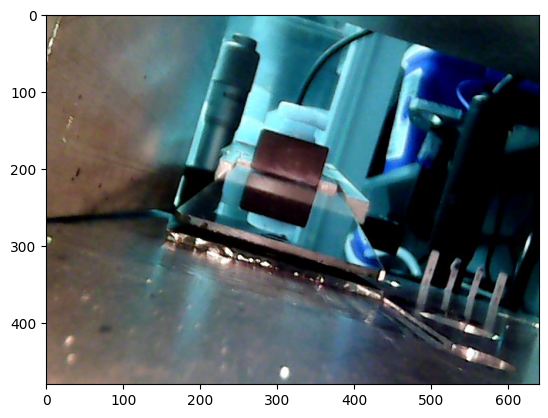

In [56]:
img_name = glob.glob('*.jpg')[0]
img = cv2.imread(img_name)
#Convert image to RGB from BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [68]:
class StoreCoordinates:
    def __init__(self):
        self.points = []
        self.rgbs = []
        
    def select_point(self,event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            # Display the clicked coordinates on shell
            print(x, ' ', y)
                
            # displaying the coordinates on the image window
            font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX   
            text = str(x) + ',' + str(y)
            cv2.putText(copy, text, (x,y), font, 0.5, (255, 255, 255), 2)
            cv2.imshow('Blade-Coater Alignment', copy)
            self.points.append((x,y))

        # checking for right mouse clicks    
        if event==cv2.EVENT_RBUTTONDOWN:
 
            # displaying the coordinates on the Shell
            print(x, ' ', y)

            # displaying the coordinates on the image window
            font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX   
            r = copy[y, x, 2]
            g = copy[y, x, 1]
            b = copy[y, x, 0]
            text = str(r) + ',' + str(g) + ',' + str(b)
            cv2.putText(copy, text, (x,y), font, 0.5, (255, 255, 255), 2)
            cv2.imshow('Blade-Coater Alignment', copy)
            self.rgbs.append((r,g,b))

#Read the image file
img_name = glob.glob('*.jpg')[0]
#Load the image
img = cv2.imread(img_name)
#Convert image to RGB from BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Make a copy of rgb image
copy = img.copy()
#instantiate class to store coordinates
cs = StoreCoordinates()
# displaying the image
cv2.imshow('Blade-Coater Alignment', copy)
# setting mouse handler for the image and calling the click_event() function
cv2.setMouseCallback('Blade-Coater Alignment',cs.select_point)
# wait for a key to be pressed to exit
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

164   273
438   342
160   279
443   363


In [57]:
cs.points

[(155, 282), (438, 363), (162, 265), (439, 346)]

In [11]:
cs.points[0]

(153, 284)

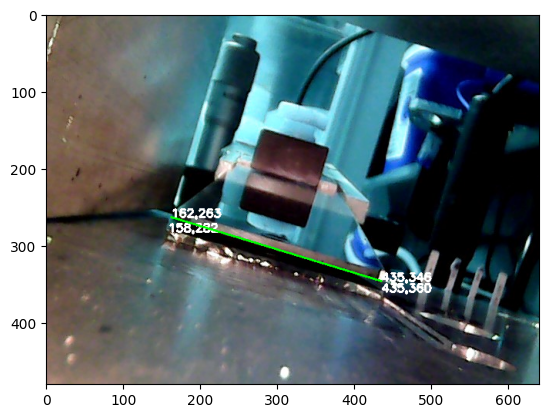

In [61]:
x1 = cs.points[0][0];y1 = cs.points[0][1]
x2 = cs.points[1][0];y2 = cs.points[1][1]
cv2.line(copy, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)
plt.imshow(copy)

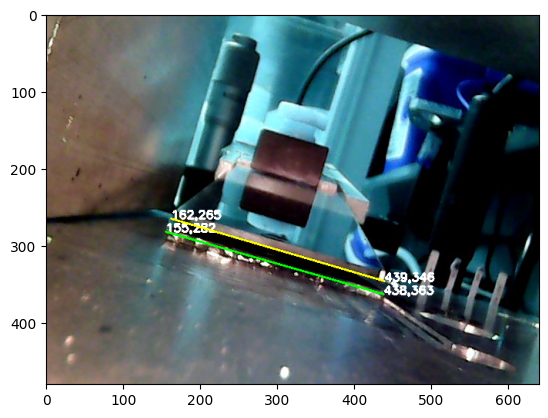

In [26]:
x1 = cs.points[2][0]
y1 = cs.points[2][1]
x2 = cs.points[3][0]
y2 = cs.points[3][1]
cv2.line(copy, (x1, y1), (x2, y2), (255, 255, 0), thickness=2)
plt.imshow(copy)

In [52]:
def calc_angle():
    #Get line coordinates
    x1 = cs.points[0][0];y1 = cs.points[0][1]
    x2 = cs.points[1][0];y2 = cs.points[1][1]
    x3 = cs.points[2][0];y3 = cs.points[2][1]
    x4 = cs.points[3][0];y4 = cs.points[3][1]

    #Use coordinates to get components of vectors
    vx1 = (x1-x2);vy1 = (y1-y2)
    vx2 = (x4-x3);vy2 = (y4-y3)

    #Vectors
    v1 = [vx1,vy1];v2 = [vx2,vy2]

    #Vector magnitudes
    mag1 = np.linalg.norm(v1);mag2 = np.linalg.norm(v2)

    #Calculate angle between vectors
    dot = np.dot(v1,v2)
    magP = (mag1*mag2)
    quot = dot/magP
    angle = round(math.degrees(np.arccos(quot)),1)
    print(angle)
    return angle

3.1


In [66]:
angle = round(math.degrees(np.arccos(quot)),1)
angle

179.7